# 6.6 Sourcing & Analyzing Time Series Data

### This script contains the following:

#### 1. Importing libraries
#### 2. Subsetting
#### 3. Decomposition
#### 4. Stationarity testing
#### 5. Stationarizing Chocolate Bar Rating
#### 6. Exporting

## 1. Importing Libraries

In [1]:
# Importing Libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Brichaelle\Flavors of Cocoa'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'prepared data', 'cleaned_sets.csv'), index_col = False)

In [8]:
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru


In [9]:
df.shape

(1795, 9)

## 2. Subsetting

In [10]:
# Creating subset

df_2 = df[['Review Date', 'Rating']]

In [11]:
df_2

,Review Date,Rating
0,2016,3.75
1,2015,2.75
2,2015,3.00
3,2015,3.50
4,2015,3.50
...,...,...
1790,2011,3.75
1791,2011,3.00
1792,2011,3.50
1793,2011,3.25


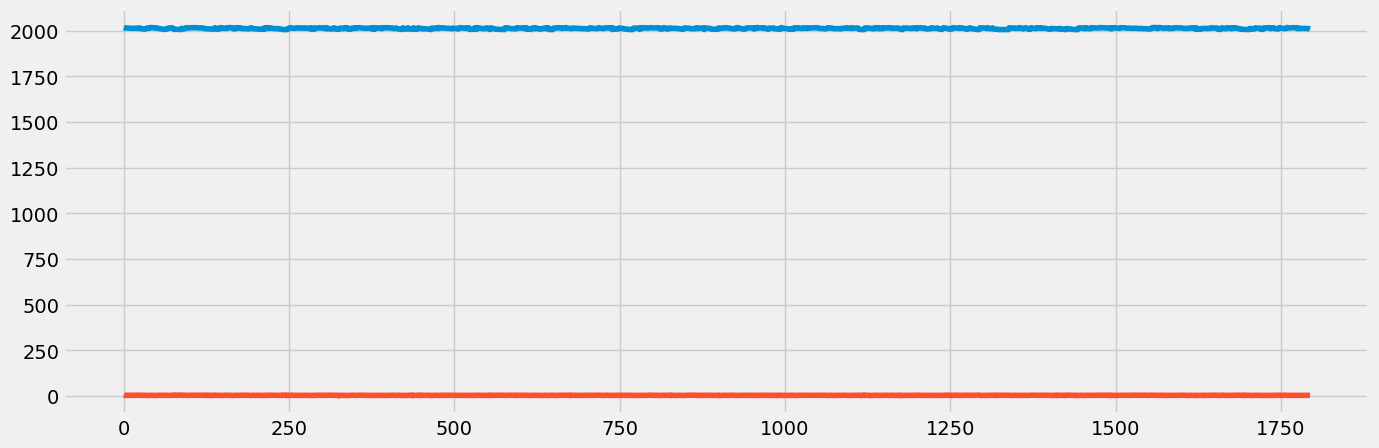

In [13]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_2)

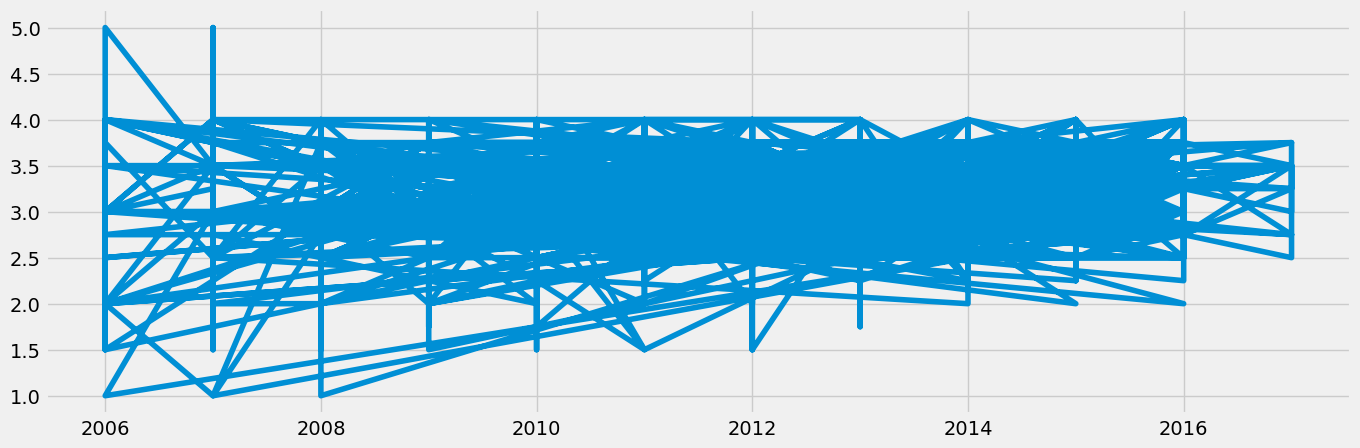

In [17]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_2)

## 3. Decomposition

In [20]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_2, model='additive') 

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

#### Due to the nature of the dataset used, decomposition does not work here even with time series defined following instructions

## 4. Stationarity Testing

In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_2['Rating'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.654759e+01
p-value                        1.958247e-29
Number of Lags Used            3.000000e+00
Number of Observations Used    1.791000e+03
Critical Value (1%)           -3.434006e+00
Critical Value (5%)           -2.863155e+00
Critical Value (10%)          -2.567630e+00
dtype: float64


#### This data set does not work well with time series analysis. Due to this reason, reducing the values for the stationary test resulted in a denser chart that does not provide much information on the collection of ratings per year

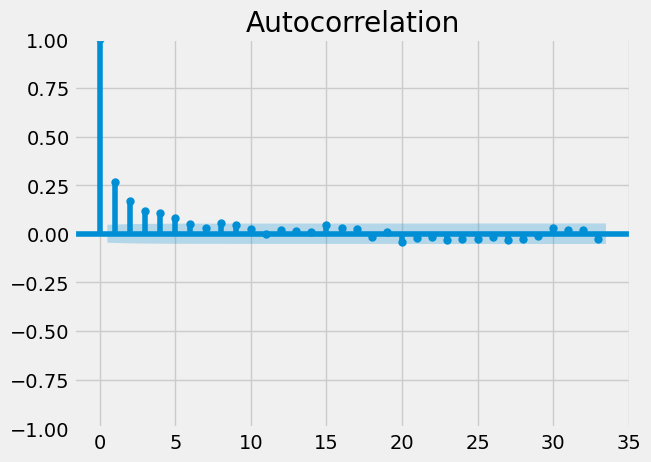

In [22]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_2)
plt.show()

## 5. Stationarizing Chocolate Bar Rating

In [23]:
data_diff = df_2 - df_2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [24]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [25]:
data_diff.head()

,Rating
Review Date,
2015,-1.00
2015,0.25
2015,0.50
2015,0.00
2014,-0.75


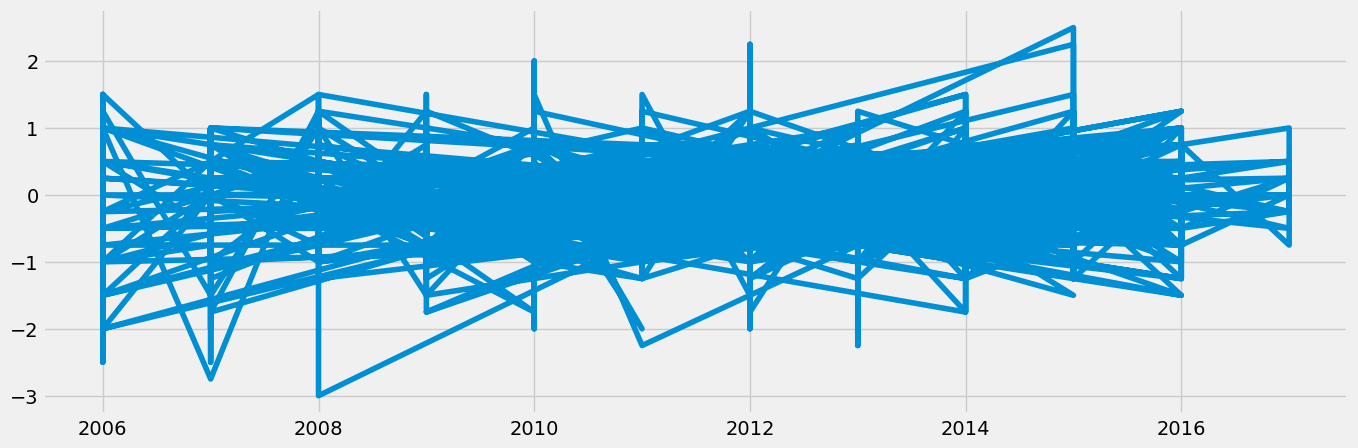

In [26]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [27]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.577999e+01
p-value                        1.134191e-28
Number of Lags Used            1.700000e+01
Number of Observations Used    1.776000e+03
Critical Value (1%)           -3.434037e+00
Critical Value (5%)           -2.863169e+00
Critical Value (10%)          -2.567637e+00
dtype: float64


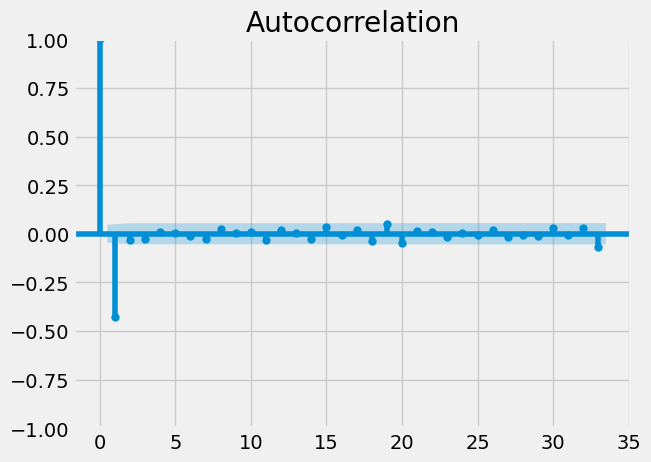

In [28]:
plot_acf(data_diff)
plt.show()

## 6. Exporting

In [29]:
df_2.to_csv(os.path.join(path, 'Data','prepared data', 'time_series_analysis.csv'))